# Tree Name Guide
| Task          | Name                   | Description                                             |
|---------------|------------------------|---------------------------------------------------------|
| Base          | `ctree_np`             | Consensus tree no paralogs                              |
|               | `stree_np`             | Supertree no paralogs                                   |
| Bootstrap     | `bctree_np`            | Consensus tree with bootstrap verified trees no paralogs|
|               | `bstree_np`            | Supertree with bootstrap verified trees no paralogs     |
| Paralogs      | `stree_p`              | Supertree with paralogs                                 |
| Final         | `ml_tree`              | ML "ground truth"/species/taxonomic tree                |
| Other         | `trees_`               | Gene trees (`c`, `b`, `np`, `p` as above)               |
|               | `tmp_`                 | Intermediate temporary tree(s) (for bootstrap)          |

Co na wysyłkę:
- [x] Skrypty, notatnik i Readme.md
- [x] Dokument z opisem metod i wynikami (mini-raport)
- [x] Prezentacja z opisem metod i wynikami
- [x] Drzewa genów bez paralogów, drzewo gatunków, drzewa genów z paralogami, drzewa genów odfiltrowanych bootstrapem

# Comparative Genomics - Project
---
by Younginn Park

Implement and test a phylogenetic pipeline for calculating a set of gene trees and further, genome trees, starting from genomes with a division into genes. Custom ideas can be applied - to be discussed.

## Part I. Proteomes
Select a set of genomes. For example:
- at least several genomes of closely related viruses (e.g., coronaviruses),
- ~30 bacteria or archaea with a size measured in genes up to 5000,
- at least 10 higher organisms; the number of genes can be slightly limited here,
- a set of genomes from different kingdoms.

Download the entire genomes from NCBI as lists of protein sequence (proteome) data. It is worth carefully considering which genomes to choose. In the project, demonstrate knowledge of the properties of the selected genomes.


### Genome sequence sources

21 *Streptococcus* and 2 *Lactococcus* bacterial species were selected from the article:

[Molecular phylogeny and a taxonomic proposal for the genus Streptococcus by F. Póntigo, M. Moraga and S.V. Flores from Universidad de Chile](http://dx.doi.org/10.4238/2015.September.21.1)

Proteomes were downloaded from NCBI datasets using:

[NCBI Datasets Command Line Tool ver. 16.3.0](https://www.ncbi.nlm.nih.gov/datasets/docs/v2/download-and-install/)


In [8]:
import pandas as pd

pd.set_option('display.max_rows', None)

In [9]:

# ./fetch_proteomes.sh

In [10]:
species = []
with open("org_spec.txt", "r") as f:
    for line in f.readlines():
        text = line.rstrip()
        if text:
            species.append(text)

accessions = []
with open("org_accs.txt", "r") as f:
    for line in f.readlines():
        text = line.rstrip()
        if text:
            accessions.append(line.rstrip())

data = pd.DataFrame.from_dict({'raw_species': species, 'accessions': accessions}, orient='columns')

def extract_species(raw_species):
    parts = raw_species.split()
    if len(parts) >= 2:
        return ' '.join(parts[:2])
    else:
        return raw_species

data['species'] = data['raw_species'].apply(extract_species)

data

,raw_species,accessions,species
0,Streptococcus ratti,GCF_008803015.1,Streptococcus ratti
1,Streptococcus downei MFe28,GCF_900459175.1,Streptococcus downei
2,Streptococcus devriesei DSM 19639,GCF_000423725.1,Streptococcus devriesei
3,Streptococcus dysgalactiae,GCF_016128095.1,Streptococcus dysgalactiae
4,Streptococcus pyogenes,GCF_900475035.1,Streptococcus pyogenes
5,Streptococcus canis,GCF_010993845.2,Streptococcus canis
6,Streptococcus equinus,GCF_900102715.1,Streptococcus equinus
7,Streptococcus lutetiensis,GCF_900475675.1,Streptococcus lutetiensis
8,Streptococcus infantarius,GCF_016127275.1,Streptococcus infantarius
9,Streptococcus entericus DSM 14446,GCF_000380025.1,Streptococcus entericus


In [11]:
# Set Aliases

def extract_aliases(species):
    parts = species.split()
    assert len(parts) == 2

    return f"{parts[0][0].upper()}{parts[1][:3].upper()}"

data['aliases'] = data['species'].apply(extract_aliases)
data

,raw_species,accessions,species,aliases
0,Streptococcus ratti,GCF_008803015.1,Streptococcus ratti,SRAT
1,Streptococcus downei MFe28,GCF_900459175.1,Streptococcus downei,SDOW
2,Streptococcus devriesei DSM 19639,GCF_000423725.1,Streptococcus devriesei,SDEV
3,Streptococcus dysgalactiae,GCF_016128095.1,Streptococcus dysgalactiae,SDYS
4,Streptococcus pyogenes,GCF_900475035.1,Streptococcus pyogenes,SPYO
5,Streptococcus canis,GCF_010993845.2,Streptococcus canis,SCAN
6,Streptococcus equinus,GCF_900102715.1,Streptococcus equinus,SEQU
7,Streptococcus lutetiensis,GCF_900475675.1,Streptococcus lutetiensis,SLUT
8,Streptococcus infantarius,GCF_016127275.1,Streptococcus infantarius,SINF
9,Streptococcus entericus DSM 14446,GCF_000380025.1,Streptococcus entericus,SENT


In [12]:
# for ind, row in data.iterrows():
#     print(f"- {row['aliases']}: *{row['species']}*")

In [13]:
# Check uniqueness of the aliases
# First letter of genus + 3 letters of species
assert data.shape[0] == data["aliases"].nunique()

In [14]:
aliases = list(data["aliases"].unique())
accessions = list(data["accessions"].unique())
aliases[:3], accessions[:3]

(['SRAT', 'SDOW', 'SDEV'],
 ['GCF_008803015.1', 'GCF_900459175.1', 'GCF_000423725.1'])

## Part II. Clustering

For the given proteomes, ~~calculate a BLAST file with pairwise sequence comparisons using the method of all against all, and~~ cluster using MCL, MMSeqs, or an alternative method.

>[MMseqs2](https://mmseqs.com/) operates by efficiently clustering biological sequences, such as proteins or nucleotides, based on a specified minimum sequence identity threshold (min_seq_id). The process involves constructing a graph where sequences are represented as nodes, and edges connect sequences that share a similarity above the defined threshold. Subsequently, connected components in the graph are identified, each corresponding to a cluster of sequences with similarity greater than or equal to the specified threshold. MMseqs2's strength lies in its ability to rapidly process and cluster large sequence datasets, making it a versatile tool for tasks like sequence clustering and database searching in bioinformatics analyses. The min_seq_id parameter dictates the minimum required sequence identity for sequences to be grouped within the same cluster, allowing users to customize the clustering stringency based on their specific analytical needs.


**mmseqs2**

`genenv` environment in `WSL`

https://anaconda.org/bioconda/mmseqs2


In [10]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import os

In [8]:
# Note to self: don't need to run this multiple times

# Rename sequences to alias_num
# Merge all genomes to one fasta

base_path = "ncbi_dataset"
prot_path = f"{base_path}/data"
seq_path = f"{base_path}/sequences"
prot_filename = "protein.faa"

output_sequences = []

for acc in data['accessions']:
    fasta_file_path = os.path.join(prot_path, acc, prot_filename)
    with open(fasta_file_path) as handle:
        num = 1
        for record in SeqIO.parse(handle, "fasta"):
            alias = data.loc[data['accessions'] == acc, 'aliases'].values[0]
            new_identifier = f"{alias}_{num}"
            record.id = new_identifier
            record.description = ""
            output_sequences.append(record)
            num += 1

output_file_path = 'sequences.fasta'

SeqIO.write(output_sequences, output_file_path, 'fasta')
print(f"Sequences saved to {output_file_path}")

del output_sequences


Sequences saved to sequences.fasta


In [29]:

# # Execute clustering script
# ./clust_mmseqs.sh


## Part III. Gene Families (1-1 Case)

Select/generate clusters (gene families) with unambiguous names of genomes and replace gene names with genome names. Skip some clusters, e.g., those with low membership or containing only one genome.


In [7]:
import numpy as np

In [8]:
# Read and analyze mmseqs results
df_mmseqs = pd.read_csv("clstrs_mmseqs_cluster.tsv", sep="\t", names=["Cluster", "Member"])

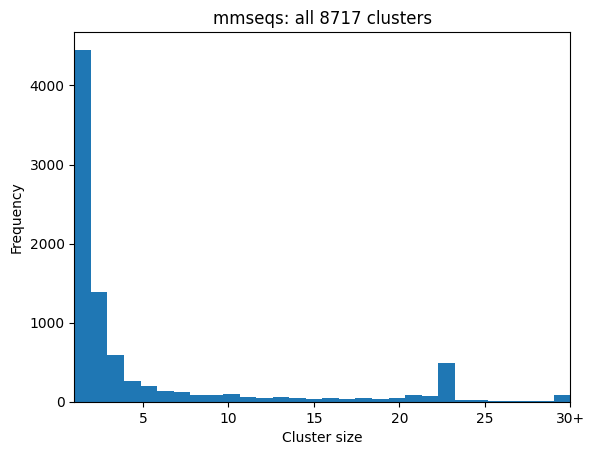

In [11]:
max_clip = 30
# df_tmp = np.clip(df_mmseqs["Cluster"].value_counts(), 0, max_clip)
df_tmp = np.clip(df_mmseqs["Cluster"].value_counts(), 0, max_clip)

plt.hist(df_tmp, bins=max(df_tmp))

labels = [int(label) for label in plt.xticks()[0]]
labels[-2] = f"{max_clip}+"
plt.xticks(plt.xticks()[0], labels)
plt.xlim(1, max(df_tmp))

plt.title(f"mmseqs: all {len(df_tmp)} clusters")
plt.xlabel("Cluster size")
plt.ylabel("Frequency")

plt.show()

In [12]:
# Select clusters having more than one element (filter out singletons)
# Redundant code (all is done in the following cell)

cluster_counts = df_mmseqs['Cluster'].value_counts()
# Minimum size of clusters
min_size = 1
non_singleton_clusters = cluster_counts[cluster_counts > min_size].index
df_sel = df_mmseqs[df_mmseqs['Cluster'].isin(non_singleton_clusters)]

In [13]:
# Filter out singletons and 2-element clusters with paralogs

# Count the number of occurrences for each cluster
cluster_counts = df_mmseqs['Cluster'].value_counts()

# Identify clusters with exactly two elements
two_element_clusters = cluster_counts[cluster_counts == 2].index

# Filter the DataFrame to keep only rows with clusters having exactly two elements
df_two_elements = df_mmseqs[df_mmseqs['Cluster'].isin(two_element_clusters)]

# Function to check if two members are from different genomes
def members_from_different_genomes(group):
    aliases = group['Member'].str.split('_').str[0]
    return aliases.nunique() == 2

# Filter out clusters where both members are from the same genome
df_two_elements_filtered = df_two_elements.groupby('Cluster').filter(members_from_different_genomes)

# Identify clusters with more than two elements
more_than_two_element_clusters = cluster_counts[cluster_counts > 2].index

# Filter the DataFrame to keep only rows with clusters having more than two elements
df_more_than_two_elements = df_mmseqs[df_mmseqs['Cluster'].isin(more_than_two_element_clusters)]

# Concatenate the two DataFrames to get the final result
df_sel = pd.concat([df_two_elements_filtered, df_more_than_two_elements])

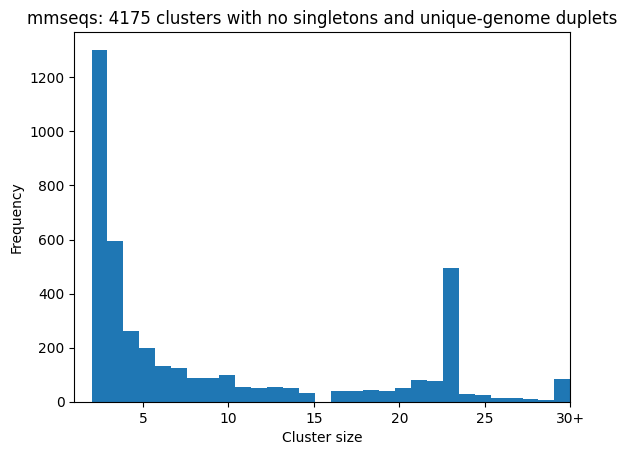

In [14]:
max_clip = 30
# df_tmp = np.clip(df_mmseqs["Cluster"].value_counts(), 0, max_clip)
df_tmp = np.clip(df_sel["Cluster"].value_counts(), 0, max_clip)

plt.hist(df_tmp, bins=max(df_tmp))

labels = [int(label) for label in plt.xticks()[0]]
labels[-2] = f"{max_clip}+"
plt.xticks(plt.xticks()[0], labels)
plt.xlim(1, max(df_tmp))

plt.title(f"mmseqs: {len(df_tmp)} clusters with no singletons and unique-genome duplets")
plt.xlabel("Cluster size")
plt.ylabel("Frequency")

plt.show()

### Strategy nr 1 - Exclusion of Singletons, Duplets, and Non-Orthologous Clusters

In [19]:

# Count the number of occurrences for each cluster
cluster_counts = df_mmseqs['Cluster'].value_counts()

# Function to check if members in a cluster are from different genomes
def members_from_different_genomes(group):
    aliases = group['Member'].str.split('_').str[0]
    return aliases.nunique() == len(group)

# Create a DataFrame to store the results - statistics for clusters
results = pd.DataFrame(columns=['Cluster Size', 'Percentage', 'Clusters with Unique Genomes'])

# Minimal size of cluster to be considered
min_size = 3

# Create a DataFrame to store selected clusters and members
df_sel = pd.DataFrame(columns=['Cluster', 'Member'])

# Iterate through unique cluster sizes
for cluster_size in range(min_size, len(data) + 2):
    # It only makes sense to check up to nr of genomes + 2 (to verify)
    # Check if clusters of the current size exist

    # Filter clusters based on the current size
    clusters_of_size_n = cluster_counts[cluster_counts == cluster_size].index

    # Filter the DataFrame to keep only rows with clusters of the current size
    df_of_size_n = df_mmseqs[df_mmseqs['Cluster'].isin(clusters_of_size_n)]

    # Check if the DataFrame is non-empty before further processing
    if not df_of_size_n.empty:
        # Apply the unique genome filtering function to each group in the DataFrame
        filtered_clusters = df_of_size_n.groupby('Cluster').filter(members_from_different_genomes)

        # Count the number of clusters that meet the criteria
        num_clusters_with_unique_genomes = len(filtered_clusters['Cluster'].unique())

        # Calculate the percentage for each cluster size
        percentage = (num_clusters_with_unique_genomes / len(clusters_of_size_n)) * 100

        # Append the results to the results DataFrame
        results = pd.concat([results, pd.DataFrame({'Cluster Size': [cluster_size], 'Percentage': [percentage], 'Clusters with Unique Genomes': [num_clusters_with_unique_genomes]})], ignore_index=True)

        # Append selected clusters and members to df_sel
        df_sel = pd.concat([df_sel, filtered_clusters[['Cluster', 'Member']]], ignore_index=True)
        
# print(results)

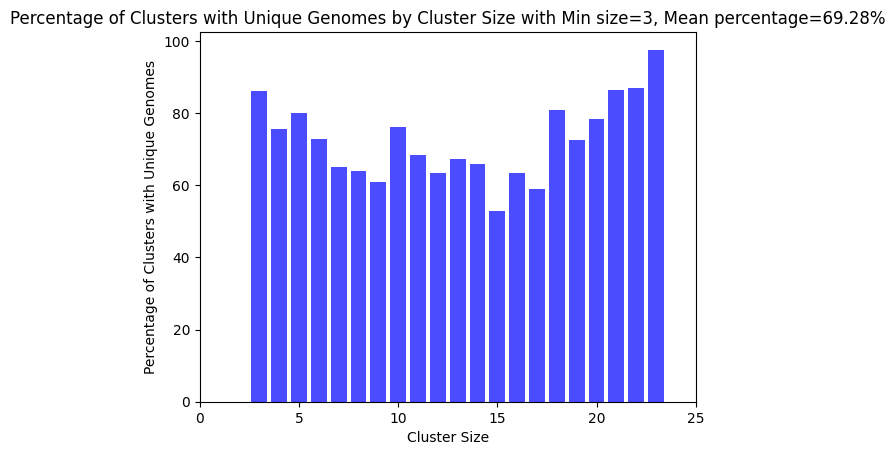

In [20]:
# Calculate the percentage for each cluster size

# Plotting
plt.bar(results['Cluster Size'], results['Percentage'], color='blue', alpha=0.7)
plt.xlim(0, len(data) + 2)
plt.xlabel('Cluster Size')
plt.ylabel('Percentage of Clusters with Unique Genomes')
plt.title(f'Percentage of Clusters with Unique Genomes by Cluster Size with Min size={min_size}, Mean percentage={results["Percentage"].mean():.2f}%')
plt.show()

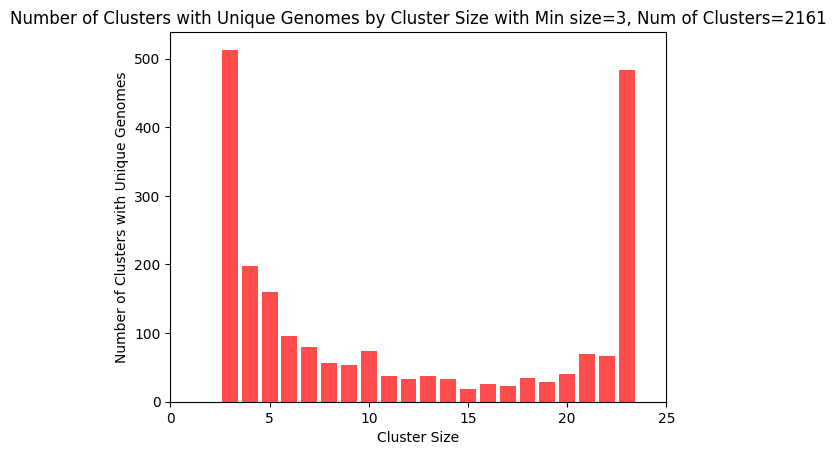

In [21]:
# Calculate the percentage for each cluster size

# Plotting
plt.bar(results['Cluster Size'], results['Clusters with Unique Genomes'], color='red', alpha=0.7)
plt.xlim(0, len(data) + 2)
plt.xlabel('Cluster Size')
plt.ylabel('Number of Clusters with Unique Genomes')
plt.title(f'Number of Clusters with Unique Genomes by Cluster Size with Min size={min_size}, Num of Clusters={results["Clusters with Unique Genomes"].sum()}')
plt.show()

### Strategy nr 2 - Elimination of Singletons and Selection of Paralogs Based on Similarity to a Representative

In [207]:
# not needed for now
# do paralog removal for non-singleton-unique-genome-duplet clusters
# by pairwise comparison (biopython) between rep and members - choose most similar with unique genome alias


### Saving Clusters to Fasta Files

In [196]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [22]:
# Whichever strategy is used
# Cluster information is in a DataFrame df_sel
# With columns "Cluster", "Member"

# Create a DataFrame to store sequences from "sequences.fasta"
df_seq = pd.DataFrame(columns=['id', 'Seq'])

sequences_file_path = 'sequences.fasta'
for record in SeqIO.parse(sequences_file_path, 'fasta'):
    sequence_id = record.id
    sequence = str(record.seq)
    df_seq = pd.concat([df_seq, pd.DataFrame({'id': [sequence_id], 'Seq': [sequence]})], ignore_index=True)


In [23]:
df_seq.head(3)

,id,Seq
0,SRAT_1,MSKTVVRKNESLDDALRRFKRSVTKAGTLQESRKREFYEKPSVKRK...
1,SRAT_2,MAQQRRGGFKRRKKVDYIAANKIEYVDYKDTELLSRFVSERGKILP...
2,SRAT_3,MKVRPSVKPICEYCKVIRRNGRVMVICPTNPKHKQRQG


In [24]:
# Merge df_sel and df_seq on columns 'id' and 'seq' to create df_cls
df_cls = pd.merge(df_sel, df_seq, left_on='Member', right_on='id', how='left')
df_cls.drop("id", inplace=True, axis=1)

In [25]:
df_cls.head(3)

,Cluster,Member,Seq
0,SINF_1523,SINF_1523,MCTAITYTTKDSYFGRNLDLDFSYNETVTICPRTYPFSFKHKGENK...
1,SINF_1523,SEQU_259,MCTAITYTTKDNYFGRNLDLDFSYNETVTICPRNYPFSFRHQGENN...
2,SINF_1523,SLUT_896,MCTAITYTTKDNYFGRNLDLDFSYNETVTICPRNYPFSFRHQGENN...


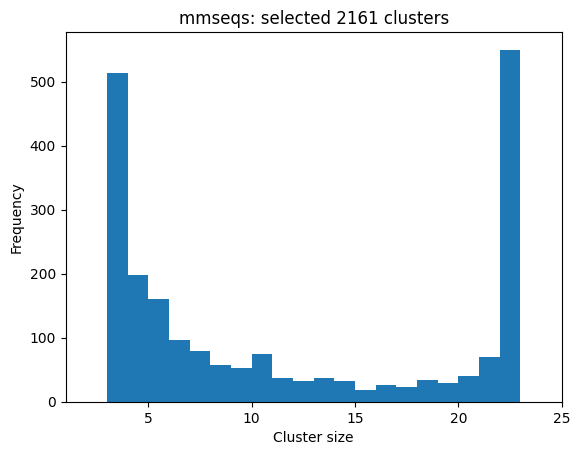

In [26]:
# Visualize for verification

max_clip = 30
# df_tmp = np.clip(df_mmseqs["Cluster"].value_counts(), 0, max_clip)
df_tmp = np.clip(df_cls["Cluster"].value_counts(), 0, max_clip)

# min_size from earlier

# plt.hist(df_tmp, bins=(max(df_tmp)))
plt.hist(df_tmp, bins=(len(data) - min_size))

# labels = [int(label) for label in plt.xticks()[0]]
# labels[-2] = f"{max_clip}+"
# plt.xticks(plt.xticks()[0], labels)
# plt.xlim(1, max(df_tmp))

plt.xlim(1, len(data) + 2)

plt.title(f"mmseqs: selected {len(df_tmp)} clusters")
plt.xlabel("Cluster size")
plt.ylabel("Frequency")

plt.show()

In [202]:

seq_folder = "sequences"
os.makedirs(seq_folder, exist_ok=True)

i = 0
# Iterate through unique clusters in df_cls
for cluster_id in df_cls['Cluster'].unique():
    # Filter df_cls for the current cluster
    cluster_df = df_cls[df_cls['Cluster'] == cluster_id]

    # Create a list of SeqRecords for the current cluster
    cluster_records = []
    for _, row in cluster_df.iterrows():
        record_id = row['Member']
        sequence = Seq(row['Seq'])
        cluster_records.append(SeqRecord(seq=sequence, id=record_id, description=''))

    # Write the SeqRecords to a fasta file named after the cluster
    output_file_path = os.path.join(seq_folder, f"{cluster_id}.fasta")
    SeqIO.write(cluster_records, output_file_path, 'fasta')

    i += 1

print(f"{i} cluster sequences saved to {seq_folder}")

2161 cluster sequences saved to sequences


In [27]:
cluster_names = list(df_cls["Cluster"].unique())
cluster_names[:3]

['SINF_1523', 'SINF_1748', 'SINF_1783']

## Part IV. Multiple Sequence Alignments
Calculate multiple alignments for each family.

**Mafft**

https://mafft.cbrc.jp/alignment/software/windows_without_cygwin.html (Used here)

https://mafft.cbrc.jp/alignment/software/ubuntu_on_windows.html

In [138]:
# Alignment for tree construction with NJ method
from Bio.Align.Applications import MafftCommandline

mafft_exe = os.path.join("mafft-7.520-win64-signed", "mafft-win", "mafft.bat")
aln_folder = "alns"
os.makedirs(aln_folder, exist_ok=True)

seq_folder = "sequences" # dir with clustered seqs

for cluster in cluster_names:
    mafft_in = os.path.join(seq_folder, f"{cluster}.fasta")
    mafft_out = os.path.join(aln_folder, f"aln_{cluster}.fasta")
    
    # Run Mafft for alignment
    mafft_cline = MafftCommandline(mafft_exe, input=mafft_in)
    stdout, stderr = mafft_cline(stdout=True)

    # Write alignment to file
    with open(mafft_out, "w") as handle:
        handle.write(stdout)

print("Alignment was successful")

Alignment was successful


## Part V. Family Trees

### Neighbor-Joining

Calculate trees from alignments using the **NJ** method (or another, e.g., ML, MP).

The use of trees from the aligning program is possible but not recommended (a decrease in the base score by 13 points).

>The BLOSUM62 matrix, a component of the BLOSUM series, serves as a scoring system for amino acid substitutions in bioinformatics applications. Derived from observed substitutions in protein sequences with up to 62% identity, BLOSUM62 is particularly well-suited for aligning moderately divergent protein sequences. Its use extends to the Neighbor-Joining algorithm for phylogenetic tree construction, where it calculates evolutionary distances between sequences. The algorithm progressively joins pairs with the shortest distances, and BLOSUM62's design ensures its effectiveness in balancing considerations for both closely and more distantly related sequences. This matrix plays a crucial role in understanding evolutionary relationships and constructing phylogenetic trees across diverse protein families.


In [206]:
# https://biopython.org/docs/dev/api/Bio.Phylo.TreeConstruction.html
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Tree construction with NJ method
# All trees will be saved into one text file

calculator = DistanceCalculator("blosum62")

trees_file = "trees_np.txt"

# Initiate empty text file
with open(trees_file, "w") as f:
    pass

trees_with_negative_lengths = 0

with open(trees_file, "a") as f:
    for cluster in cluster_names:
        # Load aligned sequences
        alignment = AlignIO.read(os.path.join(aln_folder, f"aln_{cluster}.fasta"), "fasta")
        dm = calculator.get_distance(alignment)
        constructor = DistanceTreeConstructor(calculator)
        tree = constructor.nj(dm) # Construct and return a Neighbor Joining tree.

        # Modify leaf names to first 4 letters (aliases)
        for leaf in tree.get_terminals():
            new_name = leaf.name[:4]
            leaf.name = new_name
        
        # Remove internal node labels
        for internal in tree.get_nonterminals():
            internal.name = ""

        # Check for negative branch lengths
        if any(edge.branch_length is not None and edge.branch_length < 0 for edge in tree.find_clades()):
            trees_with_negative_lengths += 1
            continue

        # Save the tree without internal node labels and branch lengths
        # One tree per line
        Phylo.write([tree], f, format="newick")

if trees_with_negative_lengths > 0:
    print(f"{trees_with_negative_lengths} trees were discarded due to negative branch lengths.")
else:
    print("All trees were successfully saved.")
print("NJ tree construction was completed.")

50 trees were discarded due to negative branch lengths.
NJ tree construction was completed.


## Part VI. Genome Tree

Calculate the genome tree using the consensus method (resolve the issue with non-orthologous clusters) and the supertree method.


### Consensus Tree

DendroPy (https://dendropy.org/)

- [Consensus function source code](https://dendropy.org/_modules/dendropy/datamodel/treecollectionmodel#TreeList.consensus)
- [Tree List class usage](https://dendropy.org/library/treecollectionmodel.html#dendropy.datamodel.treecollectionmodel.TreeList.consensus)


In [15]:
from dendropy import TaxonNamespace, TreeList

In [16]:
# Initialize a TreeList object
# Select trees that have a full set of taxa as leaves
tlist = TreeList.get(path="trees_np.txt",
           schema="newick",
           rooting="default-unrooted",
           taxon_namespace=TaxonNamespace(aliases))

with open("trees_cnp.txt", "w") as f:
    pass

# All trees used to make consensus require to have the same set of taxa
desired_num_leaves = len(aliases)

# Open the output file in append mode
with open("trees_cnp.txt", "a") as outfile:
    # Iterate through trees in the TreeList
    for tree in tlist:
        # Check the number of leaves
        num_leaves = len(tree.leaf_nodes())

        # If the number of leaves is equal to 23, append to the new file
        if num_leaves == desired_num_leaves:
            outfile.write(tree.as_string(schema="newick"))

# Read selected trees
tlist = TreeList.get(path="trees_cnp.txt",
           schema="newick",
           rooting="default-unrooted",
           taxon_namespace=TaxonNamespace(aliases))

In [17]:
len(tlist)

461

In [26]:
# Construct a majority consensus tree
consensus_tree = tlist.consensus(min_freq=0.5, is_bipartitions_updated=True)

In [27]:
ctree = consensus_tree.as_string(schema="newick")
ctree = ctree.split()[1].rstrip()
ctree

'(SRAT,SDEV,(SDOW,SENT,SPLU,SSUI,(LLAC,LCRE),(STHE,(SVES,SSAL)),(SEQU,(SLUT,SINF)),(SDYS,SPYO,SCAN),((SPNE,SPSE,SMIT),(SANG,(SCON,SINT)))));'

In [312]:
with open("ctree_np.txt", "w") as f:
    f.write(ctree)



### Supertree without Paralogs

fasturec - https://bitbucket.org/pgor17/fasturec/src/master/

A standard run (-Z heuristic):

fasturec -G datasets/g3.txt -Z

>Starts from the initial tree quasi-consensus tree (default) and executes a hill-climbing steps under the duplication-loss cost. Quasi-consensus tree is a simple tree reconstructed from cluster frequencies of the input gene trees. A mixture of NNI, SPR and TSW (leaf swapping) tree edit operations are applied.

In [ ]:

# ./run_fasturec.sh trees_np.txt


In [185]:
# Read fasturec result
with open("fu.txt") as f:
    for line in f.readlines():
        stree_data = line
        break


In [186]:
cost, stree = stree_data.split()
stree += ";"
print(f"Supertree without paralogs: {stree}\nWith cost {cost}")

Supertree without paralogs: (((SINF,SLUT),(((((((SCON,SINT),SANG),(SMIT,(SPSE,SPNE))),(SSUI,SPLU)),(SENT,(LCRE,LLAC))),((SDOW,(STHE,(SSAL,SVES))),(SDEV,SRAT))),((SCAN,SDYS),SPYO))),SEQU);
With cost 33899


In [187]:
with open("stree_np.txt", "w") as f:
    f.write(stree)

## Part VII. Analysis

Biological analysis. Compare with existing phylogenies of the tree for this set (literature), compare to NCBI taxonomy. Write a document summarizing the methods used and biological conclusions.


### ML - Maximum Likelihood
[PhyML 3.1](http://www.atgc-montpellier.fr/phyml/binaries.php)

#### Analysis Settings
- Starting tree: BioNJ
- Bootstrap: 100 replicates
- Tree improvement: NNI search

#### Model Selection
Chosen using modeltest and AIC

| Gene | Model   |
|------|---------|
| sodA | WAG     |
| tuf  | RtREV   |
etc.


In [ ]:
# Genes involved in the original Bayesian inference
# ml_genes.txt

In [41]:
import pandas as pd
from Bio import Entrez, SeqIO
import os

In [50]:
genes_df = pd.read_csv("ml_genes.txt", sep=",", names=["gene", "type", "min_len", "max_len"])
genes_list = list(genes_df["gene"])
types_list = list(genes_df["type"])
min_lens = list(genes_df["min_len"])
max_lens = list(genes_df["max_len"])
genes_list[:2], types_list[:2], min_lens[:2], max_lens[:2]

(['sodA', 'tuf'], ['protein', 'protein'], [100, 200], [300, 400])

In [51]:
species_list = []
with open("species.txt", "r") as f:
    for line in f.readlines():
        species_list.append(line.rstrip())

species_list[:3]

['Streptococcus ratti', 'Streptococcus downei', 'Streptococcus devriesei']

In [52]:


def fetch_gene_sequences(species_list, gene_list, types_list, min_lengths, max_lengths, email):
    Entrez.email = email  # Set your email address for Entrez

    results = []

    for i in range(len(gene_list)):
        gene = genes_list[i]
        # print(f"Gene {gene}")
        for species in species_list:
            # print(f"Fetching for {species}")

            query = f'"{gene}" AND "{species}"[Organism]'

            database = types_list[i] # protein or nucleotide

            try:
                handle = Entrez.esearch(db=database, term=query)
                record = Entrez.read(handle)

                if record["Count"] == "0":
                    print(f"No sequences found for {gene} in {species}")
                else:
                    for id in record["IdList"]:
                        
                        seq_handle = Entrez.efetch(db=database, id=id, rettype="gb", retmode="text")
                        seq_record = SeqIO.read(seq_handle, "genbank")

                        if min_lengths[i] <= len(seq_record) <= max_lengths[i]:
                            results.append({
                                "Gene": gene,
                                "Species": species,
                                "Sequence": str(seq_record.seq),
                                "Accession": seq_record.id,
                                "Alias": ''.join([species.split()[0].upper()[0], species.split()[1].upper()[:3]])
                            })
                            # print(f"Added {gene} entry for {species}")
                            break

            except Exception as e:
                print(f"Error fetching data for {gene} in {species}: {e}")

    return results



In [58]:
# Fetch sequences for ML tree inference
email = "y.park4@student.uw.edu.pl"  # Provide your email address

result_data = fetch_gene_sequences(species_list, genes_list, types_list, min_lens, max_lens, email)

# Display the results
result_data[0]

{'Gene': 'sodA',
 'Species': 'Streptococcus ratti',
 'Sequence': 'YIDAETMTLHHDKHHATYVANANAALEKHPEIGENLEVLLADVEQIPADIRQSLINNGGGHLNHALFWELLSPEKTKVTAEVAAAINEAFGSFDDFKAAFTAAATTRFGSGWAWLVVDKEGKLEVTSTANQDTPISQGLKPILAL',
 'Accession': 'BBC44607.1',
 'Alias': 'SRAT'}

In [59]:
# Save sequences to directory ml_sequences
def save_fasta_files(result_data, genes_list, output_directory):
    os.makedirs(output_directory, exist_ok=True)
    for gene in genes_list:
        output_file = os.path.join(output_directory, f"{gene}.fasta")
        with open(output_file, "w") as f:
            pass

    for entry in result_data:
        gene = entry["Gene"]
        sequence = entry["Sequence"]
        alias = entry["Alias"]

        output_file = os.path.join(output_directory, f"{gene}.fasta")

        with open(output_file, "a") as fasta_file:
            fasta_file.write(f">{alias}\n{sequence}\n")



In [60]:

output_directory = "sequences_ml"

save_fasta_files(result_data, genes_list, output_directory)

In [61]:
# Alignment for tree construction using ML
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO

mafft_exe = os.path.join("mafft-7.520-win64-signed", "mafft-win", "mafft.bat")
aln_folder = "alns_ml"
os.makedirs(aln_folder, exist_ok=True)

seq_folder = "sequences_ml" # dir with clustered seqs

for gene in genes_list:
    mafft_in = os.path.join(seq_folder, f"{gene}.fasta")
    mafft_out = os.path.join(aln_folder, f"aln_{gene}.fasta")

    # Run Mafft for alignment
    mafft_cline = MafftCommandline(mafft_exe, input=mafft_in)
    stdout, stderr = mafft_cline(stdout=True)

    # Write alignment to file
    with open(mafft_out, "w") as handle:
        handle.write(stdout)

    # phylip_file = os.path.join(aln_folder, f"aln_{gene}.phy")
    phylip_file = os.path.join("PhyML-3.1", aln_folder, f"aln_{gene}.phy")

    alignment = AlignIO.read(mafft_out, "fasta")
    AlignIO.write(alignment, phylip_file, "phylip-relaxed")

print("Alignment was successful")

Alignment was successful


In [77]:
from dendropy import TreeList, TaxonNamespace
import os

tlist = TreeList.get(path=os.path.join("PhyML-3.1", "aln_sodA.phy_phyml_tree.txt"),
           schema="newick",
           rooting="default-unrooted",
           taxon_namespace=TaxonNamespace(aliases))

tlist = TreeList.get(path=os.path.join("PhyML-3.1", "aln_tuf.phy_phyml_tree.txt"),
           schema="newick",
           rooting="default-unrooted",
           taxon_namespace=TaxonNamespace(aliases))

In [78]:
# Construct a majority consensus tree
consensus_tree = tlist.consensus(min_freq=0.5)

In [79]:
ctree = consensus_tree.as_string(schema="newick")
ctree = ctree.split()[1].rstrip()
ctree

'(SRAT,SDEV,(SPNE,(SDOW,((((LLAC,LCRE),((SINF,(STHE,(SVES,SSAL))),(SMIT,(SSUI,(SPSE,((SENT,SPLU),(SDYS,(SPYO,SCAN)))))))),(SEQU,SLUT)),(SINT,(SCON,SANG))))));'

In [ ]:
with open("ml_tree2.txt", "w") as f:
    f.write(ctree)

In [ ]:
# Final species ML tree in file
# ml_tree.txt

# Final Analysis in file
# analysis.Rmd
# analysis.pdf

## Part Va. Bootstrapping

Eliminate poorly supported trees using bootstrapping. Check if this yields better results than the method without elimination.

### Bootstrap replicate trees from Bio.Phylo.Consensus.bootstrap_trees

[Biopython Consensus source code](https://github.com/biopython/biopython/blob/master/Bio/Phylo/Consensus.py)

### Sumtrees for replicate trees analysis for branch support

[Dendropy SumTrees documentation](https://dendropy.org/programs/sumtrees)


In [38]:
# https://biopython.org/wiki/Phylo
# https://biopython.org/docs/dev/api/Bio.Phylo.TreeConstruction.html
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.Consensus import bootstrap_trees, get_support

In [28]:
# Check if number of clusters is correct
len(cluster_names)

2161

In [ ]:
# requires a python environment with dendropy (sumtrees.py) on Unix/WSL
# run_bootstrap_analysis.py

import subprocess
from dendropy import Tree

# Tree construction with NJ method
# All trees will be saved into one text file

aln_folder = "alns"

times = 100

calculator = DistanceCalculator("blosum62")

trees_file = "trees_bnp.txt"

# Initiate empty text file
with open(trees_file, "w") as f:
    pass

trees_with_negative_lengths = 0

min_support = 0.9 # min, average or median
low_sup_count = 0
counter = 0

for cluster in cluster_names:
    counter += 1
    print(f"Tree {counter}/{len(cluster_names)}")
    # Load aligned sequences
    alignment = AlignIO.read(os.path.join(aln_folder, f"aln_{cluster}.fasta"), "fasta")
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor(calculator, method='nj')
    nj_tree = constructor.nj(dm)

    # Check for negative branch lengths
    if any(edge.branch_length is not None and edge.branch_length < 0 for edge in nj_tree.find_clades()):
        trees_with_negative_lengths += 1
        print(f"Tree {counter} is nr {trees_with_negative_lengths} with negative lengths")
        continue


    # If nj_tree is good - do pre-processing for bootstrapping        
    for leaf in nj_tree.get_terminals():
        new_name = leaf.name[:4]
        leaf.name = new_name
    
    # Remove internal node labels
    for internal in nj_tree.get_nonterminals():
        internal.name = ""

    # Create replicate trees
    trees = bootstrap_trees(alignment, times, constructor)

    with open("tmp_repltrees.txt", "w") as f:
        for replicate in list(trees):
            for leaf in replicate.get_terminals():
                new_name = leaf.name[:4]
                leaf.name = new_name
            for internal in replicate.get_nonterminals():
                internal.name = ""
            f.write(replicate.format("newick"))

    Phylo.write([nj_tree], "tmp_nj_tree.txt", format="newick")

    subprocess.run(["sumtrees.py",
                    "-t", "tmp_nj_tree.txt",
                    "--unrooted",
                    "-i", "newick",
                    "-o", "tmp_boot.txt",
                    "-F", "newick",
                    "tmp_repltrees.txt",
                    "-q", "-r"])

    bctree = Tree.get(path="tmp_boot.txt", schema="newick")


    supports = []
    for node in bctree.nodes():
        supports.append(float(node.annotations["support"].value))

    # support_value = np.min(supports)
    # support_value = np.median(supports)
    support_value = np.mean(supports)

    if support_value < min_support:
        low_sup_count += 1
        print(f"Tree {counter} with {len(supports)} nodes is nr {low_sup_count} with low support: {support_value:.3f}")
        continue
    else:
        print(f"Tree {counter} with {len(supports)} nodes has high support: {support_value:.3f}")
        with open(trees_file, "a") as f:
            Phylo.write([nj_tree], f, format="newick")


if trees_with_negative_lengths > 0 or low_sup_count > 0:
    print(f"{trees_with_negative_lengths} trees were discarded due to negative branch lengths.")
    print(f"{low_sup_count} trees were discarded due to low support.")
else:
    print("All trees were successfully saved.")
print("NJ tree construction was completed.")

# 
# 50 trees with negative branches
# 368 trees with low support

### Consensus on bootstrap verified trees

In [10]:
from dendropy import TreeList, TaxonNamespace

# Initialize a TreeList object
# Select trees that have a full set of taxa as leaves
tlist = TreeList.get(path="trees_bnp.txt",
           schema="newick",
           rooting="default-unrooted",
           taxon_namespace=TaxonNamespace(aliases))

with open("trees_bcnp.txt", "w") as f:
    pass

# All trees used to make consensus require to have the same set of taxa
desired_num_leaves = len(aliases)

# Open the output file in append mode
with open("trees_bcnp.txt", "a") as outfile:
    # Iterate through trees in the TreeList
    for tree in tlist:
        # Check the number of leaves
        num_leaves = len(tree.leaf_nodes())

        # If the number of leaves is equal to 23, append to the new file
        if num_leaves == desired_num_leaves:
            outfile.write(tree.as_string(schema="newick"))

# Read selected trees
tlist = TreeList.get(path="trees_bcnp.txt",
           schema="newick",
           rooting="default-unrooted",
           taxon_namespace=TaxonNamespace(aliases))

In [11]:
len(tlist)

206

In [12]:
# Construct a majority consensus tree
consensus_tree = tlist.consensus(min_freq=0.5)

In [13]:
ctree = consensus_tree.as_string(schema="newick")
ctree = ctree.split()[1].rstrip()
ctree

'(SRAT,SDEV,(SDOW,SENT,SPLU,SSUI,(LLAC,LCRE),(STHE,(SVES,SSAL)),(SEQU,(SLUT,SINF)),(SDYS,SPYO,SCAN),((SMIT,(SPNE,SPSE)),(SANG,(SCON,SINT)))));'

In [14]:
with open("bctree_np.txt", "w") as f:
    f.write(ctree)

### Supertree with bootstrap verified trees

In [ ]:
# ./run_fasturec.sh trees_bnp.txt

In [1]:
# Read fasturec result
with open("fu.txt") as f:
    for line in f.readlines():
        stree_data = line
        break


In [2]:
cost, stree = stree_data.split()
stree += ";"
print(f"Supertree without paralogs: {stree}\nWith cost {cost}")

Supertree without paralogs: (((((((((SINF,SLUT),SEQU),(STHE,(SSAL,SVES))),(SDOW,(SDEV,SRAT))),((SENT,SPLU),((SCAN,SDYS),SPYO))),((LCRE,LLAC),SSUI)),(SMIT,(SPSE,SPNE))),(SCON,SINT)),SANG);
With cost 22114


In [3]:
with open("bstree_np.txt", "w") as f:
    f.write(stree)

## Part Vb. Paralog Families

Apply clusters without removing sequences, allowing for paralogs. Calculate the supertree and compare with the results for "1-1" clusters.

### Supertree with Paralogs


In [153]:
# Save clusters with paralogs, no singletons
df_mmseqs.head()

# Select clusters having more than one element (filter out singletons)
cluster_counts = df_mmseqs['Cluster'].value_counts()
# Minimum size of clusters
min_size = 1
non_singleton_clusters = cluster_counts[cluster_counts > min_size].index
df_sel = df_mmseqs[df_mmseqs['Cluster'].isin(non_singleton_clusters)]


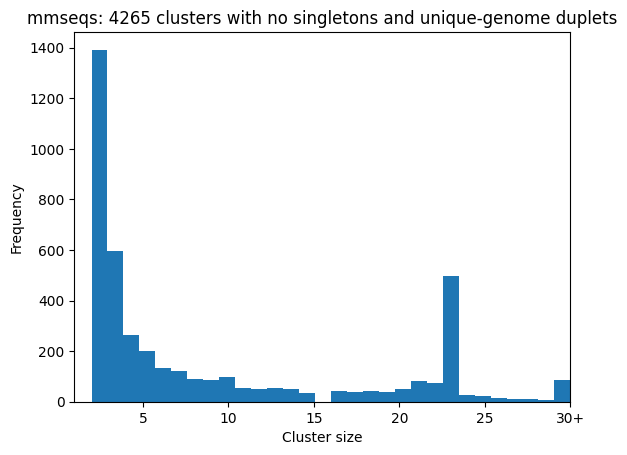

In [154]:
# Visualize for verification
max_clip = 30
# df_tmp = np.clip(df_mmseqs["Cluster"].value_counts(), 0, max_clip)
df_tmp = np.clip(df_sel["Cluster"].value_counts(), 0, max_clip)

plt.hist(df_tmp, bins=max(df_tmp))

labels = [int(label) for label in plt.xticks()[0]]
labels[-2] = f"{max_clip}+"
plt.xticks(plt.xticks()[0], labels)
plt.xlim(1, max(df_tmp))

plt.title(f"mmseqs: {len(df_tmp)} clusters with no singletons and unique-genome duplets")
plt.xlabel("Cluster size")
plt.ylabel("Frequency")

plt.show()

In [156]:
df_cls = pd.merge(df_sel, df_seq, left_on='Member', right_on='id', how='left')
df_cls.drop("id", inplace=True, axis=1)
df_cls.head()

,Cluster,Member,Seq
0,SINF_1238,SINF_1238,MSDIELDFAKQDGLLPVIVTDYKTGQVLMLAYMNEEAYRLTLETKQ...
1,SINF_1238,SRAT_620,MTDFKLDFEKQNGLVPVIVTDYQTNQVLMLAYMNQEAYQLTLETKQ...
2,SINF_1238,SDOW_635,MTEITLDFAKQGGLIPVIVTDYQTGQVLMLAYMNQESYDLTLKTKE...
3,SINF_1238,SDEV_1472,MTDIQLDFAKQDGLIPVIVTDYQTGQVLMLAYMNEESYQLTLETKQ...
4,SINF_1238,SEQU_335,MSEIKLDFAKQGGLLPVIVTDYQTGQVLMLAYMNEEAYRLTLETKQ...


In [157]:

seq_folder = "sequences_para"
os.makedirs(seq_folder, exist_ok=True)

i = 0
# Iterate through unique clusters in df_cls
for cluster_id in df_cls['Cluster'].unique():
    # Filter df_cls for the current cluster
    cluster_df = df_cls[df_cls['Cluster'] == cluster_id]

    # Create a list of SeqRecords for the current cluster
    cluster_records = []
    for _, row in cluster_df.iterrows():
        record_id = row['Member']
        sequence = Seq(row['Seq'])
        cluster_records.append(SeqRecord(seq=sequence, id=record_id, description=''))

    # Write the SeqRecords to a fasta file named after the cluster
    output_file_path = os.path.join(seq_folder, f"{cluster_id}.fasta")
    SeqIO.write(cluster_records, output_file_path, 'fasta')

    i += 1

print(f"{i} cluster sequences saved to {seq_folder}")

4265 cluster sequences saved to sequences_para


In [158]:
cluster_names = list(df_cls["Cluster"].unique())
cluster_names[:3]

['SINF_1238', 'SINF_1466', 'SINF_1468']

In [159]:
# Alignment for tree construction with NJ method
from Bio.Align.Applications import MafftCommandline

mafft_exe = os.path.join("mafft-7.520-win64-signed", "mafft-win", "mafft.bat")
aln_folder = "alns_para"
os.makedirs(aln_folder, exist_ok=True)

for cluster in cluster_names:
    mafft_in = os.path.join(seq_folder, f"{cluster}.fasta")
    mafft_out = os.path.join(aln_folder, f"aln_{cluster}.fasta")
    
    # Run Mafft for alignment
    mafft_cline = MafftCommandline(mafft_exe, input=mafft_in)
    stdout, stderr = mafft_cline(stdout=True)

    # Write alignment to file
    with open(mafft_out, "w") as handle:
        handle.write(stdout)

print("Alignment was successful")

Alignment was successful


In [160]:
# https://biopython.org/docs/dev/api/Bio.Phylo.TreeConstruction.html
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Tree construction with NJ method
# All trees will be saved into one text file

calculator = DistanceCalculator("blosum62")

trees_file = "trees_p.txt"

# Initiate empty text file
with open(trees_file, "w") as f:
    pass

trees_with_negative_lengths = 0

with open(trees_file, "a") as f:
    for cluster in cluster_names:
        # Load aligned sequences
        alignment = AlignIO.read(os.path.join(aln_folder, f"aln_{cluster}.fasta"), "fasta")
        dm = calculator.get_distance(alignment)
        constructor = DistanceTreeConstructor(calculator)
        tree = constructor.nj(dm) # Construct and return a Neighbor Joining tree.

        # Modify leaf names to first 4 letters (aliases)
        for leaf in tree.get_terminals():
            new_name = leaf.name[:4]
            leaf.name = new_name
        
        # Remove internal node labels
        for internal in tree.get_nonterminals():
            internal.name = ""

        # Check for negative branch lengths
        if any(edge.branch_length is not None and edge.branch_length < 0 for edge in tree.find_clades()):
            trees_with_negative_lengths += 1
            continue

        # Save the tree without internal node labels and branch lengths
        # One tree per line
        Phylo.write([tree], f, format="newick")

if trees_with_negative_lengths > 0:
    print(f"{trees_with_negative_lengths} trees were discarded due to negative branch lengths.")
else:
    print("All trees were successfully saved.")
print("NJ tree construction was completed.")

78 trees were discarded due to negative branch lengths.
NJ tree construction was completed.


In [ ]:

# ./run_fasturec.sh trees_p.txt


In [188]:
# Read fasturec result
with open("fu.txt") as f:
    for line in f.readlines():
        stree_data = line
        break

In [189]:
cost, stree = stree_data.split()
stree += ";"
print(f"Supertree without paralogs: {stree}\nWith cost {cost}")

Supertree without paralogs: ((((((SDEV,SRAT),(SDOW,((SSAL,SVES),STHE))),((SEQU,(SLUT,SINF)),((SCAN,SDYS),SPYO))),((SSUI,SPLU),((SANG,(SCON,SINT)),(SMIT,(SPSE,SPNE))))),SENT),(LLAC,LCRE));
With cost 53205


In [190]:
with open("stree_p.txt", "w") as f:
    f.write(stree)


## Dodatkowe informacje.

Wyślij na moodle wyniki całego pipeline’u, który powinien być w dużym stopniu zautomatyzowany i najlepiej zrównoleglony; można używać narzędzi do pipelinowania np. snakemake. Wymagane:

- skrytpy (bash, python, etc.)

- dokument z wynikami (nie dane!) format odt, doc, pdf

- README - opis jak używać skrypty

- drzewa genów w jednym pliku + plik z drzewem gatunków: format newick

- jeśli więcej wariantów obliczeń, np. V.a, V.b - dodaj więcej plików drzew



## Cennik
Max. 40 pkt, w tym 27pkt bazowe + 2x4 pkt bonusów (opisanych powyżej) + 5 prezentacja na ostatnim wykładzie/labie

Prezentacja ok. 15-25. min; wysyłka wyników na moodle maks. dzień przed

w przypadku braku prezentacji, wymagana jest prezentacja osobista do końca sesji I (termin I)  lub do końca sesji II (termin II) po uprzednim przesłaniu projektów i umówieniu się,

w przypadku większej liczby zainteresowanych w sesji wyznaczę termin dodatkowy na prezentacje ale bez bonusu 5pkt